# SLR FINAL EXAM

### DATA DESCRIPTION: 


This dataset is having data of customers who buys clothes online. This file has customer email, avg. session time with stylist, Time spent on the app and website, Length of Membership. Our main objective is to predict the Yearly amount spent by the customers.

### ATTRIBUTES:

Email: Email of the customer  

Address: Address of the customer     

Avatar: Avatar chosen by the customer  

Avg. Session Length: Average duration of the online session

Time on App: Time spent on App      

Time on Website: Time spent on website  

Length of Membership: Time period of membership

Yearly Amount Spent: Yearly amount spent by the customer


In [147]:
#Importing reqiured libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import linear_rainbow
from statsmodels.stats.api import het_goldfeldquandt
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import PolynomialFeatures

### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 

In [ ]:
## Kindly change the below cells from markdown to code and execute it 

In [1]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


#### a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

In [6]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 500
Number of Columns: 8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.3+ KB


**There are 3 object type and 5 numerical present in the dataset.**

#### b.	Calculate five point summary for numerical variables

In [7]:
df.describe(include=np.number)

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


#### c.	Summarize observations for categorical variables – no. of categories, % observations in each category

In [9]:
df.describe(exclude = np.number)

,Email,Address,Avatar
count,500,500,500
unique,500,500,138
top,douglasdunlap@boone-rose.com,USNV Fuller\nFPO AE 32122-5711,Teal
freq,1,1,7


### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not? 


#### a.	Do variables have missing/null values?

In [10]:
df.isna().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

**There is no missing values present in the dataset.**

#### b.	Do variables have outliers?

In [12]:
num_data = df.select_dtypes(include = np.number)
cat_data = df.select_dtypes(exclude = np.number)

Dividing the numerical and categorical columns

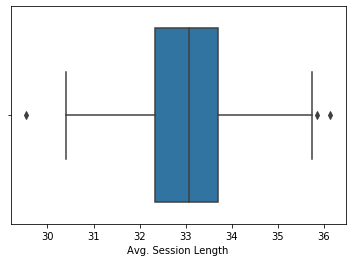

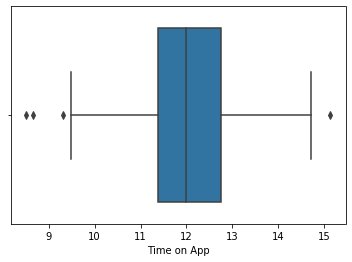

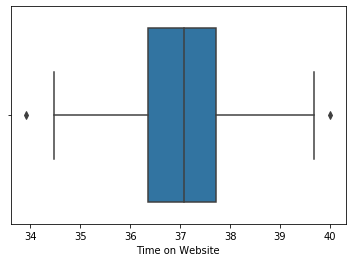

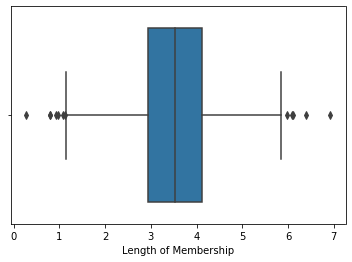

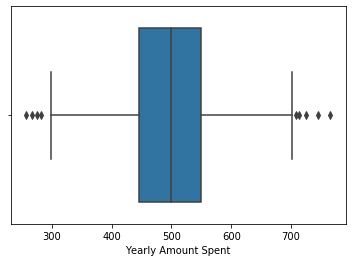

In [13]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

There are some outliers present in the dataset.

In [16]:
for i in num_data.columns:
    q1 = num_data[i].quantile(0.25)
    q3 = num_data[i].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - iqr*1.5
    ub = q3 + iqr*1.5
    num_data[i] = num_data[i].replace(num_data[num_data[i] > ub][i], num_data[i].quantile(.99))
    num_data[i] = num_data[i].replace(num_data[num_data[i] < lb][i], num_data[i].quantile(.01))

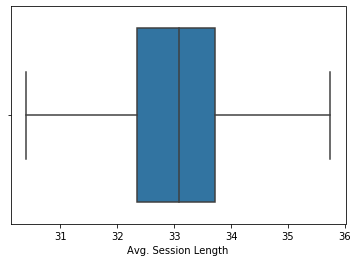

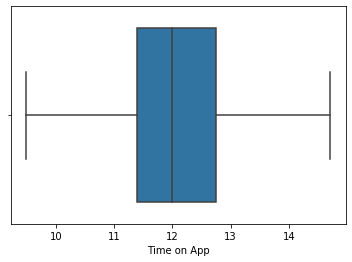

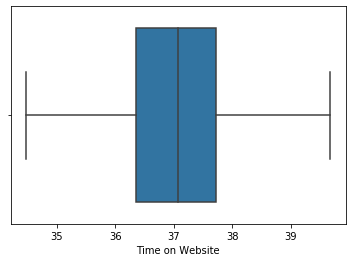

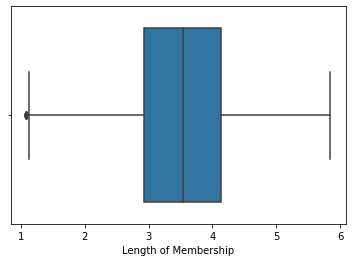

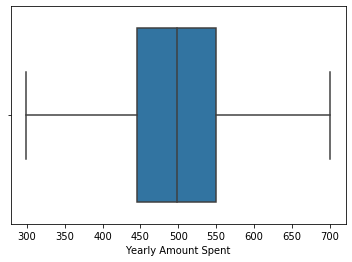

In [17]:
for i in num_data.columns:
    sns.boxplot(num_data[i])
    plt.show()

We have capped the numerical variables with 99 percentile and 1 percentile data and got rid of outliers.

In [21]:
print('Unique Addresses:',len(cat_data['Address'].unique()))
print('Unique Emails: ',len(cat_data['Email'].unique()))

Unique Addresses: 500
Unique Emails:  500


As we can see all the values in Address and Email columns are unique. It will not affect our model so we can drop them.

In [22]:
cat_data = cat_data.drop(['Address','Email'],axis = 1)

In [32]:
print('Unique Avatars:',len(cat_data['Avatar'].unique()))
cat_data['Avatar'].value_counts()

Unique Avatars: 138


Teal                    7
GreenYellow             7
SlateBlue               7
CadetBlue               7
Cyan                    7
Wheat                   6
DarkGoldenRod           6
Turquoise               6
SaddleBrown             6
DarkViolet              6
Bisque                  6
BlueViolet              6
Tomato                  6
Moccasin                6
OliveDrab               6
DarkSeaGreen            6
Orange                  6
Aqua                    6
PeachPuff               6
LightSkyBlue            6
DeepPink                6
Purple                  6
Orchid                  5
MediumSpringGreen       5
LimeGreen               5
SteelBlue               5
White                   5
Thistle                 5
SandyBrown              5
LemonChiffon            5
                       ..
OldLace                 2
ForestGreen             2
LightYellow             2
AliceBlue               2
DarkGray                2
Fuchsia                 2
Snow                    2
Peru        

We have 138 unique avatar values and maximum value count is 7. So we can drop this feature also as we have very less data for each category. It will not affect the model.

In [33]:
cat_data = cat_data.drop('Avatar',axis=1)

#### c.	Is the data normally distributed? Is it a defect? Why or why not? 

Skewness: -0.017504753107768112


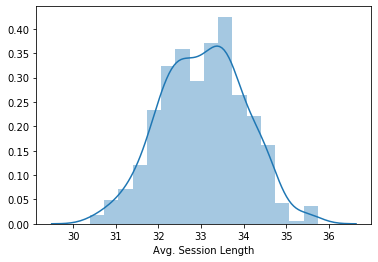

Skewness: 0.00491090511046268


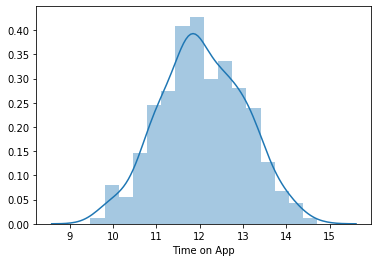

Skewness: 0.020339715318451218


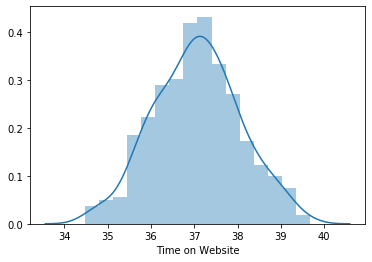

Skewness: -0.13839987025126746


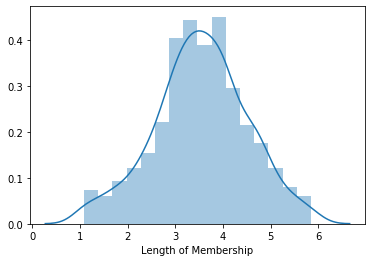

Skewness: 0.015929276262054967


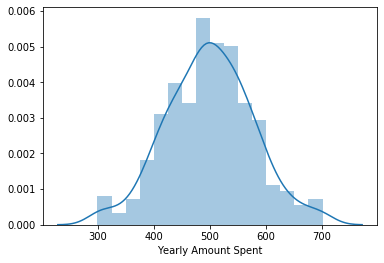

In [37]:
for i in num_data.columns:
    sns.distplot(num_data[i])
    print('Skewness:',num_data[i].skew())
    plt.show()

All numerical data are normally distributed as the skewness value is close to zero.

For Linear Regression, Some assumption needs to be met. One of those is, data should be normally distributed. Because Linear Regreesion Model is sensitive to outliers. So for Linear Regression model, if the data is not normally distributed, then it is a defect.

In [38]:
final_df = pd.concat((num_data,cat_data),axis=1)
final_df.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


### 4.	Summarize relationships among variables (10 marks)  

a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


#### a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

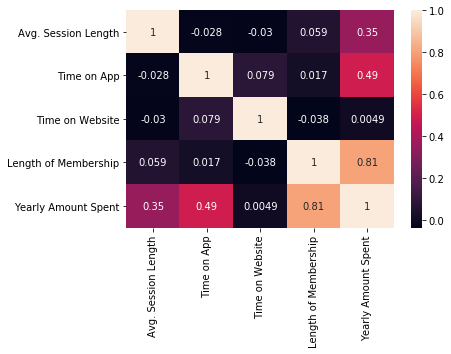

In [39]:
sns.heatmap(final_df.corr(),annot=True)
plt.show()

1. 'Length of Membership' is highly correlated to target variable 'Yearly Amount Spent' (0.81).
2. 'Time on app' is moderatly correlated to target variable 'Yearly Amount Spent' (0.49).
3. 'Avg. Session Length' is moderatly correlated to target variable 'Yearly Amount Spent' (0.35).

**There is very less correlation among the independent features. They are not correlate to each other.**

**We cannot exclude any variable as there is high correlation between the independent features.**

#### b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

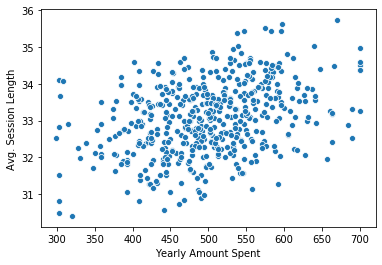

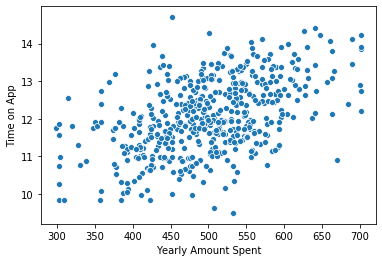

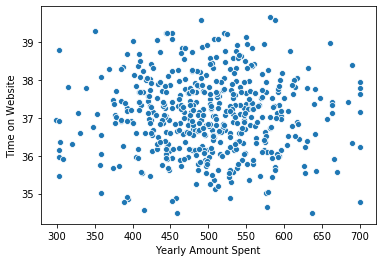

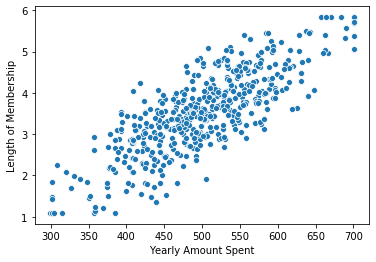

In [42]:
for i in final_df.columns[:-1]:
    sns.scatterplot(x = final_df['Yearly Amount Spent'], y = final_df[i])
    plt.show()

1. As we have already seen that, Length of Membership has high correlation with target variable, and the scatterplot also shown that it has linear relationship with target variable.
2. Time on Website has least correlation with target variable, and the scatterplot also shows that.
3. Avg Session Length and Time on App has moderate correlation with target variable and the scatterplot also shows that moderate linear relationship between them.

### 5.	Split dataset into train and test (70:30) (5 marks)

a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [78]:
inp = final_df.drop('Yearly Amount Spent', axis=1)
out = final_df['Yearly Amount Spent']

In [79]:
xtrain, xtest, ytrain, ytest = train_test_split(inp, out, test_size = 0.3, random_state = 48)

In [80]:
mean = pd.DataFrame()
mean['Overall'] = inp.describe().T['mean']
mean['Train'] = xtrain.describe().T['mean']
mean['Test'] = xtest.describe().T['mean']
mean

,Overall,Train,Test
Avg. Session Length,33.053496,33.068968,33.017395
Time on App,12.056625,12.093671,11.970184
Time on Website,37.060671,37.107643,36.951070
Length of Membership,3.532101,3.507354,3.589844


In [81]:
std = pd.DataFrame()
std['Overall'] = inp.describe().T['std']
std['Train'] = xtrain.describe().T['std']
std['Test'] = xtest.describe().T['std']
std

,Overall,Train,Test
Avg. Session Length,0.978885,0.978906,0.981160
Time on App,0.972476,0.934089,1.054862
Time on Website,1.001969,1.026079,0.937481
Length of Membership,0.978106,0.957641,1.025235


If we compare the mean and std of overall, train and test data, we can see the train and test values are very close to overall data. This indicates that, train and test data are representative of overall data.

### 6.	Fit a base model. Please write your key observations (15 marks) 

a.	What is the overall R2? Please comment on whether it is good or not.

b.	What is the adjusted R2? Is it different from R2? Why?

c.	Which variables are significant?

d.	Is there multicollinearity?

e.	Which other key model output parameters do you want to look at? 


In [191]:
inpc = sm.add_constant(inp)
ols_mod_base = sm.OLS(out,inpc).fit()
ols_mod_base.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                     6040.
Date:                 Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                         07:59:59   Log-Likelihood:                -1908.7
No. Observations:                  500   AIC:                             3827.
Df Residuals:                      495   BIC:                             3848.
Df Model:                            4                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1045.2122     25.746    -40.597      0.000   -1095.798    -994.627
Avg. Session Length     25.4249      0.507     50.137      0.000      24.429      26.421
Time on App             38.8751      0.511     76.066      0.000      37.871      39.879
Time on Website          0.4457      0.496      0.898      0.370      -0.529       1.421
Length of Membership    61.9676      0.508    122.086      0.000      60.970      62.965
==============================================================================
Omnibus:                       28.522   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.450
Skew:                          -0.374   Prob(JB):                     6.73e-12
Kurtosis:                       4.382   Cond. No.                     2.67e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### a.	What is the overall R2? Please comment on whether it is good or not.

The overall R2 value is 0.980. That means our base model is predicting the target variable value 98% correctly using the independent features. It is a very good score.

#### b.	What is the adjusted R2? Is it different from R2? Why?

Adjusted R2 is same as R2 here i.e. 0.980.

Yes Adjusted R2 is different from R2.

The main difference between R2 and Adjusted R2 is that, R2 assumes that every single variable explains the variation in the dependent or target variable. But Adjusted R2 tells the percentage of variation explained by only the independent variables that actually affect the dependent variable.

But here we are getting same value for R2 and Adjusted R2, that means all the features are independent features and the variance explained by them is affecting the model.

#### c.	Which variables are significant?

All the variables are significant except 'Time on Website' as the P-value of T-Satistics of 'Time on Website' is greater than 0.05 and coefficient is 0.4457. It is not affecting the model much. We have also seen earlier that 'Time on Website' hass very less correlation and linear relationship with the target variable.

#### d.	Is there multicollinearity?

In [87]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(inpc.values,i) for i in range(inpc.shape[1])]
vif['Features'] = inpc.columns
vif.sort_values('VIF',ascending=False)

,VIF,Features
0,2708.856671,const
3,1.008559,Time on Website
2,1.007407,Time on App
4,1.005215,Length of Membership
1,1.004950,Avg. Session Length


As we can see VIF value is 1 for all features so there is no multicollinearity present among the features.

#### e.	Which other key model output parameters do you want to look at? 

In [92]:
het_goldfeldquandt(ols_mod.resid,ols_mod.model.exog)

(1.1136053296822286, 0.20015614467357554, 'increasing')

**As the p-value is greater than 0.05, the model is homoscedastic.**

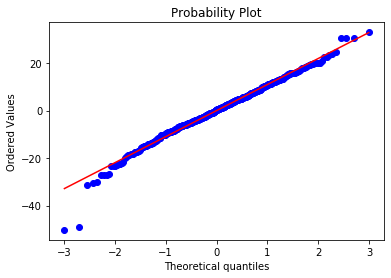

In [99]:
stats.probplot(x = ols_mod.resid , plot = plt)
plt.show()

In [100]:
ols_mod.resid.skew()

-0.374795992743879

**From the probplot and the skewness value, we can say that the model is normally distributed.**

**As the Durbin-Watson value is close to 2, we can say that there is no auto-correlation present in the data.**

--------

### 7.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [188]:
lr = LinearRegression()
lr.fit(xtrain,ytrain)
y_pred = lr.predict(xtest)
r2 = r2_score(ytest,y_pred)
rmse = np.sqrt(mean_squared_error(ytest,y_pred))
base_res = [r2,rmse]
base_res

[0.9824710462856076, 10.95474815858166]

These are the r2 and rmse score of base model. We will try to improve the r2 score and reduce the rmse value.

#### Feature Selection:

In [111]:
lr = LinearRegression()
backward = sfs(estimator = lr, k_features = 'best', forward = False, scoring = 'r2')
sfs_backward = backward.fit(xtrain,ytrain)
feat_back = sfs_backward.k_feature_names_
feat_back

('Avg. Session Length', 'Time on App', 'Length of Membership')

Using Backward Elimination we have got this best features.

In [112]:
lr = LinearRegression()
forward = sfs(estimator = lr, k_features = 'best', forward = True, scoring = 'r2')
sfs_forward = forward.fit(xtrain,ytrain)
feat_forw = sfs_forward.k_feature_names_
feat_forw

('Avg. Session Length', 'Time on App', 'Length of Membership')

Using Forward Selection we have got this best features.

In [108]:
lr = LinearRegression()
rfe = RFECV(estimator=lr)
rfe_mod = rfe.fit(xtrain,ytrain)
rfe_mod.ranking_

array([1, 1, 2, 1])

In [109]:
rank = pd.DataFrame()
rank['Features'] = xtrain.columns
rank['Rank'] = rfe_mod.ranking_
feat_rfe = rank[rank['Rank'] == 1]['Features']
feat_rfe

0     Avg. Session Length
1             Time on App
3    Length of Membership
Name: Features, dtype: object

So we have used Recursive Feature Elimination and got this best features.

In [113]:
feat_back = list(feat_back)
feat_forw = list(feat_forw)
feat_rfe = list(feat_rfe)

In [114]:
feature = pd.DataFrame()
feature['Backward Elimination'] = feat_back
feature['Forward Selection'] = feat_forw
feature['Recursive Feature Elimination'] = feat_rfe
feature

,Backward Elimination,Forward Selection,Recursive Feature Elimination
0,Avg. Session Length,Avg. Session Length,Avg. Session Length
1,Time on App,Time on App,Time on App
2,Length of Membership,Length of Membership,Length of Membership


So every feature selection technique giving same features.

In [117]:
lr = LinearRegression()
lr.fit(xtrain[feat_back],ytrain)
ypred = lr.predict(xtest[feat_back])
r2 = r2_score(ytest,y_pred)
rmse = np.sqrt(mean_squared_error(ytest,y_pred))
back_res = [r2,rmse]
back_res

[0.9824710462856076, 10.95474815858166]

We are getting 0.982 R2 and 10.95 rmse value after using best features.

#### Cross Validation:

In [149]:
lr = LinearRegression()
rmse = np.sqrt(abs(cross_val_score(lr, inp[feat_back], out, cv = 5, scoring = 'neg_mean_squared_error')))
be = np.mean(rmse) # Bias Error
ve = np.std(rmse) # Variance Error
cve = ve/be # Coefficient of Variance
res_base = [be,ve,cve]
res_base

[11.142928007244503, 1.0258805513162046, 0.09206561782048982]

Coefficient of Variance is very low, that means my model is not overfitting model. Still let's use some regularization to improve the model.

In [150]:
mod_rid = Ridge(alpha=5)
res = cross_val_score(mod_rid, inp[feat_back], out, cv = 5, scoring= 'neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse) # Bias Error
ve = np.std(rmse) # Variance Error
cve = ve/be # Coefficient of Variance
res_ridge = [be,ve,cve]
res_ridge

[11.161521683142855, 1.2112961434052054, 0.10852428349752839]

let's use hyperparameter tuning to get best alpha value.

In [165]:
mod_rid = Ridge()
param = {'alpha': [0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,1000]}
random = RandomizedSearchCV(mod_rid, param_distributions= param, cv = 3, scoring = 'neg_mean_squared_error')
mod_hyp = random.fit(inp[feat_back],out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.05}
124.69405503017795


So for alpha = 0.05 , Ridge giving best result.

In [166]:
results = pd.DataFrame(mod_hyp.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002417,0.000488,0.001151,0.000100,60,{'alpha': 60},-207.775092,-261.915841,-336.566373,-268.752435,52.800585,8
1,0.001791,0.000038,0.001098,0.000006,50,{'alpha': 50},-180.547412,-216.194563,-292.930046,-229.890674,46.891021,7
2,0.001789,0.000006,0.001070,0.000008,0.05,{'alpha': 0.05},-119.279609,-111.301463,-143.501093,-124.694055,13.691633,1
3,0.001748,0.000014,0.001046,0.000021,8,{'alpha': 8},-117.898225,-108.765368,-156.705406,-127.789666,20.783684,5
4,0.001727,0.000021,0.001023,0.000014,1000,{'alpha': 1000},-2903.070574,-4085.180623,-3547.744083,-3511.998427,483.255872,10
5,0.001723,0.000014,0.001038,0.000023,80,{'alpha': 80},-271.391836,-367.215588,-431.575182,-356.727535,65.813755,9
6,0.001694,0.000010,0.001025,0.000010,0.001,{'alpha': 0.001},-119.305217,-111.347803,-143.436407,-124.696476,13.643530,2
7,0.001695,0.000008,0.001060,0.000046,3,{'alpha': 3},-118.134707,-109.227492,-147.784165,-125.048788,16.482469,3
8,0.001683,0.000012,0.001032,0.000012,40,{'alpha': 40},-157.185145,-176.568497,-252.699451,-195.484364,41.223805,6
9,0.001680,0.000016,0.001032,0.000015,5,{'alpha': 5},-117.790103,-108.596697,-151.109550,-125.832117,18.263646,4


In [167]:
mod_rid = Ridge(alpha=0.05)
res = cross_val_score(mod_rid, inp[feat_back], out, cv = 5, scoring= 'neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse) # Bias Error
ve = np.std(rmse) # Variance Error
cve = ve/be # Coefficient of Variance
res_ridge = [be,ve,cve]
res_ridge

[11.142701983175733, 1.0277612652243262, 0.09223626969258747]

-----

In [168]:
mod_las = Lasso(alpha=0.1)
res = cross_val_score(mod_las, inp[feat_back], out, cv = 5, scoring= 'neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse) # Bias Error
ve = np.std(rmse) # Variance Error
cve = ve/be # Coefficient of Variance
res_las = [be,ve,cve]
res_las

[11.139893598305713, 1.0553537780740965, 0.09473643251265947]

let's use hyperparameter tuning to get best alpha value.

In [169]:
mod_las = Lasso()
param = {'alpha': [0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,1000]}
random = RandomizedSearchCV(mod_las, param_distributions= param, cv = 3, scoring = 'neg_mean_squared_error')
mod_hyp = random.fit(inp[feat_back],out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'alpha': 0.005}
124.69439580653894


So for alpha = 0.005 , Lasso giving best result.

In [170]:
results = pd.DataFrame(mod_hyp.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001808,0.000148,0.001083,1.716209e-05,0.0001,{'alpha': 0.0001},-119.305487,-111.348000,-143.435955,-124.696481,13.643223,2
1,0.001682,0.000005,0.001069,7.530237e-06,70,{'alpha': 70},-5235.830903,-6898.924348,-6078.489740,-6071.081663,678.975263,10
2,0.001671,0.000014,0.001072,8.240688e-06,3,{'alpha': 3},-133.483747,-129.928680,-193.175131,-152.195853,29.013050,3
3,0.001656,0.000003,0.001075,8.206126e-06,20,{'alpha': 20},-1014.356628,-1803.998193,-1372.530803,-1396.961875,322.832370,7
4,0.001670,0.000011,0.001070,8.438356e-06,6,{'alpha': 6},-190.042813,-231.561829,-290.429637,-237.344760,41.186246,4
5,0.001669,0.000012,0.001072,9.823180e-06,8,{'alpha': 8},-251.293878,-345.457949,-381.662899,-326.138242,54.948210,6
6,0.001681,0.000014,0.001071,7.837652e-06,30,{'alpha': 30},-2035.438483,-3355.400615,-2605.581632,-2665.473577,540.533867,8
7,0.001668,0.000010,0.001074,8.305579e-06,7,{'alpha': 7},-218.313843,-283.895820,-333.406576,-278.538747,47.138858,5
8,0.001669,0.000014,0.001075,7.100267e-06,40,{'alpha': 40},-3066.683676,-4646.896267,-3843.666875,-3852.415606,645.148750,9
9,0.001666,0.000017,0.001059,8.991328e-07,0.005,{'alpha': 0.005},-119.294092,-111.310636,-143.478459,-124.694396,13.676371,1


In [171]:
mod_las = Lasso(alpha=0.005)
res = cross_val_score(mod_las, inp[feat_back], out, cv = 5, scoring= 'neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse) # Bias Error
ve = np.std(rmse) # Variance Error
cve = ve/be # Coefficient of Variance
res_las = [be,ve,cve]
res_las

[11.142711156456892, 1.0273571368431673, 0.09219992535190526]

-------

In [172]:
mod_enet = ElasticNet(alpha=0.1)
res = cross_val_score(mod_enet, inp[feat_back], out, cv = 5, scoring= 'neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse) # Bias Error
ve = np.std(rmse) # Variance Error
cve = ve/be # Coefficient of Variance
res_enet = [be,ve,cve]
res_enet

[11.689680064402594, 1.6880001718383297, 0.14440088715332994]

let's use hyperparameter tuning to get best alpha value.

In [173]:
mod_enet = ElasticNet()
param = {'alpha': [0.0001,0.001,0.005,0.01,0.05,0.1,0.5,1,2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,1000],
         'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}
random = RandomizedSearchCV(mod_enet, param_distributions= param, cv = 3, scoring = 'neg_mean_squared_error')
mod_hyp = random.fit(inp[feat_back],out)
print(mod_hyp.best_params_)
print(abs(mod_hyp.best_score_))

{'l1_ratio': 0.3, 'alpha': 0.001}
124.68768851459201


So for alpha = 0.001 and l1_ratio = 0.3 , ElasticNet giving best result.

In [174]:
results = pd.DataFrame(mod_hyp.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_ratio,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001809,0.000166,0.001055,0.000032,0.6,20,"{'l1_ratio': 0.6, 'alpha': 20}",-4362.255174,-5938.098970,-5157.456306,-5152.603484,643.344687,5
1,0.001655,0.000031,0.001096,0.000087,0.4,60,"{'l1_ratio': 0.4, 'alpha': 60}",-5083.830897,-6751.984988,-5923.903524,-5919.906470,681.026920,7
2,0.001662,0.000003,0.001081,0.000004,0.2,100,"{'l1_ratio': 0.2, 'alpha': 100}",-5155.439531,-6818.599863,-5995.792010,-5989.943801,678.994955,10
3,0.001664,0.000009,0.001073,0.000013,0.1,100,"{'l1_ratio': 0.1, 'alpha': 100}",-5140.650990,-6795.060940,-5978.599513,-5971.437148,675.429022,8
4,0.001670,0.000007,0.001065,0.000002,0.3,0.001,"{'l1_ratio': 0.3, 'alpha': 0.001}",-119.185175,-111.129603,-143.748288,-124.687689,13.873306,1
5,0.001671,0.000012,0.001074,0.000011,0.7,8,"{'l1_ratio': 0.7, 'alpha': 8}",-2816.533467,-4026.162940,-3466.341834,-3436.346080,494.284449,4
6,0.001664,0.000014,0.001071,0.000010,0.5,70,"{'l1_ratio': 0.5, 'alpha': 70}",-5138.463300,-6813.918379,-5984.500349,-5978.960676,684.012888,9
7,0.001675,0.000016,0.001082,0.000011,0.9,40,"{'l1_ratio': 0.9, 'alpha': 40}",-4596.289942,-6321.211758,-5458.627871,-5458.709857,704.196385,6
8,0.001666,0.000014,0.001064,0.000003,0.7,0.0001,"{'l1_ratio': 0.7, 'alpha': 0.0001}",-119.300318,-111.338749,-143.448905,-124.695991,13.652850,2
9,0.001662,0.000007,0.001071,0.000010,0.7,7,"{'l1_ratio': 0.7, 'alpha': 7}",-2592.212268,-3731.072267,-3215.009367,-3179.431301,465.617778,3


In [175]:
mod_enet = ElasticNet(alpha=0.001, l1_ratio=0.3)
res = cross_val_score(mod_enet, inp[feat_back], out, cv = 5, scoring= 'neg_mean_squared_error')
rmse = np.sqrt(abs(res))
be = np.mean(rmse) # Bias Error
ve = np.std(rmse) # Variance Error
cve = ve/be # Coefficient of Variance
res_enet = [be,ve,cve]
res_enet

[11.14176153781014, 1.0364987303502644, 0.0930282636935688]

In [176]:
scorecard = pd.DataFrame()
scorecard['Linear Regression'] = res_base
scorecard['Ridge'] = res_ridge
scorecard['Lasso'] = res_las
scorecard['ElasticNet'] = res_enet
scorecard.index = ['Bias Error', 'Variance Error', 'Coefficient of Variance']
scorecard

,Linear Regression,Ridge,Lasso,ElasticNet
Bias Error,11.142928,11.142702,11.142711,11.141762
Variance Error,1.025881,1.027761,1.027357,1.036499
Coefficient of Variance,0.092066,0.092236,0.092200,0.093028


So we can see Ridge, Lasso and ElasticNet giving more or less same values as Linear Regression. So we will stick to Linear Regression.

#### Feature Interaction:

In [182]:
inter = PolynomialFeatures(degree = 2, include_bias=False, interaction_only= True)
inp_inter = inter.fit_transform(inp[feat_back])
inp_inter = pd.DataFrame(inp_inter)
inp_inter.shape

(500, 6)

In [180]:
inpc = sm.add_constant(inp_inter)
ols_mod = sm.OLS(out,inpc).fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                     4046.
Date:                 Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                         07:44:06   Log-Likelihood:                -1906.5
No. Observations:                  500   AIC:                             3827.
Df Residuals:                      493   BIC:                             3856.
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -820.8766    219.509     -3.740      0.000   -1252.165    -389.588
0             18.2233      6.663      2.735      0.006       5.132      31.315
1             29.9336     17.368      1.723      0.085      -4.191      64.059
2             42.3210     18.211      2.324      0.021       6.541      78.101
3              0.3460      0.528      0.655      0.513      -0.692       1.384
4              0.8488      0.509      1.669      0.096      -0.150       1.848
5             -0.6949      0.505     -1.377      0.169      -1.686       0.297
==============================================================================
Omnibus:                       23.074   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.378
Skew:                          -0.302   Prob(JB):                     1.03e-09
Kurtosis:                       4.274   Cond. No.                     1.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So after using feature interaction, we are getting same R2 and Adjusted R2. So we will not use feature interaction.

---------

#### Final Model:

In [190]:
inpc = sm.add_constant(inp[feat_back])
ols_mod_final = sm.OLS(out,inpc).fit()
ols_mod_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                     8056.
Date:                 Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                         07:59:43   Log-Likelihood:                -1909.1
No. Observations:                  500   AIC:                             3826.
Df Residuals:                      496   BIC:                             3843.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1028.6791     17.994    -57.169      0.000   -1064.032    -993.326
Avg. Session Length     25.4130      0.507     50.141      0.000      24.417      26.409
Time on App             38.9114      0.509     76.391      0.000      37.911      39.912
Length of Membership    61.9503      0.507    122.163      0.000      60.954      62.947
==============================================================================
Omnibus:                       28.753   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.958
Skew:                          -0.376   Prob(JB):                     5.22e-12
Kurtosis:                       4.389   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [194]:
coef = pd.DataFrame()
coef['Base Model'] = ols_mod_base.params
coef['Final Model'] = ols_mod_final.params
coef

,Base Model,Final Model
const,-1045.212206,-1028.679086
Avg. Session Length,25.424936,25.413048
Time on App,38.875060,38.911373
Time on Website,0.445678,NaN
Length of Membership,61.967558,61.950326


In [184]:
lr = LinearRegression()
lr.fit(inp[feat_back],out)
ypred = lr.predict(xtest[feat_back])
r2 = r2_score(ytest,ypred)
rmse = np.sqrt(abs(mean_squared_error(ytest,ypred)))
final_res = [r2,rmse]
final_res

[0.9825649723224259, 10.925359121808494]

In [185]:
model = pd.DataFrame()
model['Base Model'] = base_res
model['Final Model'] = final_res
model.index = ['R2', 'RMSE']
model

,Base Model,Final Model
R2,0.982471,0.982565
RMSE,10.954748,10.925359


So we are getting same R2 as base model in our final model but , emse has been reduced a little bit in our final model.

### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3.	What changes from the base model had the most affect on model performance
4.	What are the key risks to your results and interpretation


#### 1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model

In the base model, there were 4 features but after feature selection technique, we have 3 features and drop one feature i.e. 'Time on Website'. And the R2 and Adjusted R2 score of base model and final model is same i.e. 0.980. We have used RMSE also as a metric. And the value of RMSE has been reduced in the final.

#### 2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.

We have 3 features in our final model which are affecting the target variable the most.

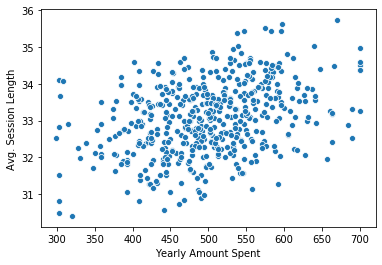

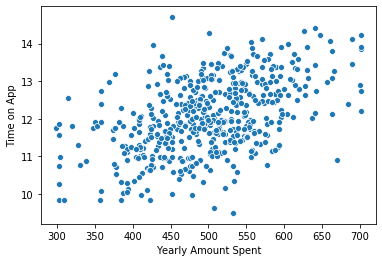

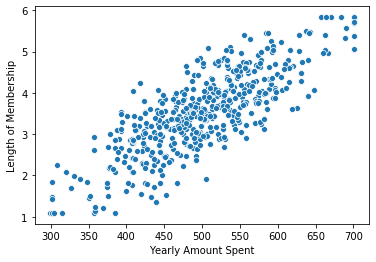

In [195]:
for i in inp[feat_back].columns:
    sns.scatterplot(x = out, y = final_df[i])
    plt.show()

Length of Membership has the highest linear relationship with the target variable and affecting the most folowed by 'Time on App' and 'Avg. Session Length'.

In [196]:
ols_mod_final.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.980
Model:                             OLS   Adj. R-squared:                  0.980
Method:                  Least Squares   F-statistic:                     8056.
Date:                 Tue, 08 Dec 2020   Prob (F-statistic):               0.00
Time:                         08:08:00   Log-Likelihood:                -1909.1
No. Observations:                  500   AIC:                             3826.
Df Residuals:                      496   BIC:                             3843.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1028.6791     17.994    -57.169      0.000   -1064.032    -993.326
Avg. Session Length     25.4130      0.507     50.141      0.000      24.417      26.409
Time on App             38.9114      0.509     76.391      0.000      37.911      39.912
Length of Membership    61.9503      0.507    122.163      0.000      60.954      62.947
==============================================================================
Omnibus:                       28.753   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.958
Skew:                          -0.376   Prob(JB):                     5.22e-12
Kurtosis:                       4.389   Cond. No.                     1.29e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. 1 unit change in 'Avg.Session Length', 25 unit change in 'Yearly Amount Spent'.
2. 1 unit change in 'Time on App', 39 unit change in 'Yearly Amount Spent'.
3. 1 unit change in 'Length of Membership', 62 unit change in 'Yearly Amount Spent'.

#### 3.	What changes from the base model had the most affect on model performance

We had one useless feature in our base model i.e. 'Time on Website'. Using Feature Selection Technique, we have removed that feature and still getting same R2 and Adjusted R2 score and less RMSE in our final model. Then we have checked if the model is overfitting or not and it's not a overfit model but still we have regularization techniques to improve the model performance. But failed to do so and stick with Linear Regression as it is giving best result.

#### 4.	What are the key risks to your results and interpretation

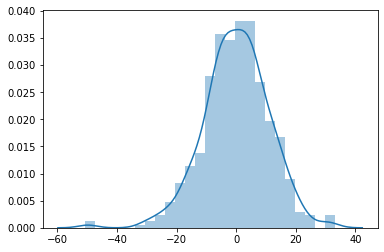

In [198]:
sns.distplot(ols_mod_final.resid)
plt.show()

We can see, the distribution of residue of my final model is normally ditributed.

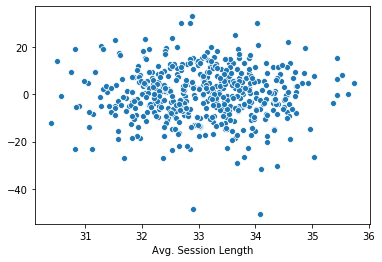

In [201]:
sns.scatterplot(inp[feat_back].iloc[:,0],ols_mod_final.resid)
plt.show()

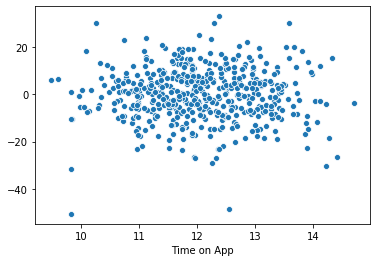

In [202]:
sns.scatterplot(inp[feat_back].iloc[:,1],ols_mod_final.resid)
plt.show()

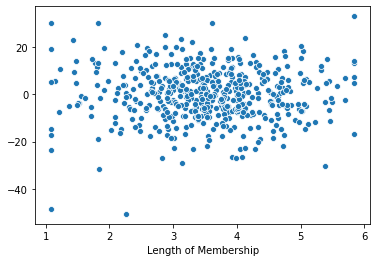

In [203]:
sns.scatterplot(inp[feat_back].iloc[:,2],ols_mod_final.resid)
plt.show()

The features are randomly scattered with respect to residue of final model.

As we can see that, residue of final model is normally distributed and the features are randomly scattered with respect to residue, we can say our final model is appropriate and there is no such risk involve in it.
